# Business Question

use machine learning to create a model that predicts which passengers survived the Titanic shipwreck. we’ll gain access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled `train.csv` and the other is titled `test.csv`.

Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes

# importing

In [166]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Data Understanding

In [167]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")
combine = [train_df, test_df]

In [168]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [169]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [170]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [171]:
print(test_df.shape)
print(train_df.shape)

(418, 11)
(891, 12)


In [172]:
train_df.info()
print('_'*50,"\n")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
__________________________________________________ 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0

In [173]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [174]:
train_df.describe(include="O")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [175]:
for col in train_df.columns:
    print(col,":",train_df[col].nunique())
    print(train_df[col].value_counts().nlargest(5))
    print('\n' + '*' * 20 + '\n')

PassengerId : 891
1      1
599    1
588    1
589    1
590    1
Name: PassengerId, dtype: int64

********************

Survived : 2
0    549
1    342
Name: Survived, dtype: int64

********************

Pclass : 3
3    491
1    216
2    184
Name: Pclass, dtype: int64

********************

Name : 891
Braund, Mr. Owen Harris             1
Boulos, Mr. Hanna                   1
Frolicher-Stehli, Mr. Maxmillian    1
Gilinski, Mr. Eliezer               1
Murdlin, Mr. Joseph                 1
Name: Name, dtype: int64

********************

Sex : 2
male      577
female    314
Name: Sex, dtype: int64

********************

Age : 88
24.0    30
22.0    27
18.0    26
19.0    25
28.0    25
Name: Age, dtype: int64

********************

SibSp : 7
0    608
1    209
2     28
4     18
3     16
Name: SibSp, dtype: int64

********************

Parch : 7
0    678
1    118
2     80
5      5
3      5
Name: Parch, dtype: int64

********************

Ticket : 681
347082      7
CA. 2343    7
1601        7
31012

# Data Cleaning

## train_df

In [176]:
"""There's 21 passengers have cabin num C23 C25 C27 and 24 passengers have B96 B98 cabin num and thus is incredible.
so we will drop this data."""
train_df=train_df[train_df['Cabin']!='C23 C25 C27']
train_df=train_df[train_df['Cabin']!='B96 B98']
train_df=train_df[train_df['Cabin']!='C22 C26']


In [177]:
train_df.Cabin.value_counts().nlargest(5)

G6      4
F33     3
F2      3
E101    3
D       3
Name: Cabin, dtype: int64

In [178]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## test_df

In [179]:
test_df.isnull().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [180]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (880, 12) (418, 11) (891, 12) (418, 11)


('After', (880, 10), (418, 9), (880, 10), (418, 9))

# EDA

In [181]:
categorical=list(train_df.select_dtypes(include=['object']).columns)
numerical=list(train_df.select_dtypes(include=['number']).columns)

In [182]:
categorical

['Name', 'Sex', 'Embarked']

In [183]:
numerical

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [184]:
numerical.remove('Survived')
numerical.remove('PassengerId')

In [185]:
categorical.remove('Name')

In [186]:
train_df[categorical].nunique()

Sex         2
Embarked    3
dtype: int64

## Feature Importance

It's often done as a part of exploratory data analysis to figure out which veriables will be usefl for the model. It also gives us additional insights and helps us answer questions like:
1. what makes passenger survived
2. what are charcteristices of people who are survived?

### 1. Category features

In [187]:
#global mean is measured on target only
global_mean=train_df.Survived.mean()
round(global_mean,2)

0.38

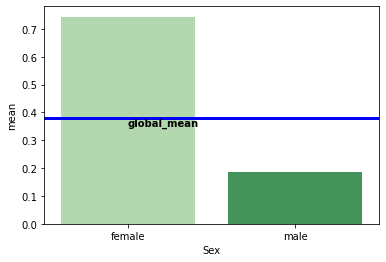

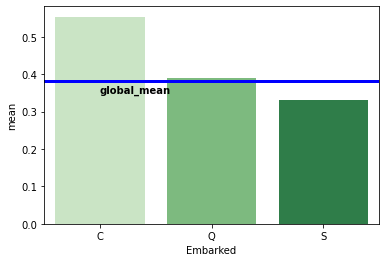

In [188]:
# for all categorical features
for feature in categorical:
    train_df_group=train_df.groupby(by=feature).Survived.agg(['mean']).reset_index()
    graph=sns.barplot(x=feature,y='mean',data=train_df_group,palette='Greens')
    graph.axhline(global_mean,linewidth=3,color='b')
    plt.text(0,global_mean-0.03,'global_mean',color='black',weight='semibold')
    plt.show()

> sex and Embarked affect if passenger is survived or not

In [189]:
from sklearn.metrics import mutual_info_score

def calculate_mi(series):
    return mutual_info_score(series, train_df.Survived)

df_mi = train_df[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')

display(df_mi)

###
"""
if value of mi is high this means that this feature is importance else not 
"""

ValueError: Input contains NaN

In [ ]:
import scipy.stats as stats 
from IPython.display import display
train_df[numerical].corrwith(train_df.Survived)
df_group=[]
for feature in numerical:
    anova_args = tuple(train_df.groupby('Survived')[feature].apply(list).reset_index()[feature])
    f_statistic, p_value = stats.f_oneway(*anova_args)
    df_group.append({"p_value":p_value,"p_value <0.05 ":p_value<0.05})


df_group=pd.DataFrame(df_group,index=numerical)
display(df_group)


### What are survived more females or males ?

### 2. Nmeric Features

In [ ]:
sns.heatmap(train_df.corr())

### What's age distribution of passengers are survived ?

In [ ]:
sns.scatterplot(x='Age',y='Survived',data=train_df);

> surviving not depend on age alone , there are another factors with age